<h1>AIML CA1</h1>

<h5>Name : Rejey Ezekiel Jeyakumar
</br>Class : DAAA/FT/1B/01
</br>Admin No. : 2348935</h5>

<hr>

<h5><b>The objectives of this assignment are to:</b></h5>
<ol>
<li>Explore the given dataset,<i> credit_dataset.csv</i>, and try to gain insights from it.</li>
<li>Build a classification model to predict whether a customer will default payment in the next month, in order to better manage risk for a bank.</li>
</ol>

<h5><b>Background Info:</b></h5>
A bank has collected data on it's customers, such as their age, gender, level of education, credit limit, payment and bill history. From this data, the bank would like to predict if a customer would default on their bill in the upcoming month, in a attempt to mitigate risk taken. If a customer is predicted to default on their bill, the bank can take action to mitigate the risk, such as reducing the credit limit of the customer, or contacting the customer to remind them to pay their bill.

<h5><b>Additional Info:</b></h5>
A default is a missed or multiple missed payments on money that you have borrowed. An example of a default would be not paying your credit card bill or your monthly mortgage payment. (Investopedia, 2023)

Potential Reasons for Defaulting:
<ol>
<li>Customer does not have high income, does not have money to repay</li>
</ol>

</br>
<hr>
<h3>Importing Libraries</h3>
<hr></hr>

In [308]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SKLEARN Libraries
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, RobustScaler

# Model Selection
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    GridSearchCV,
    learning_curve,
    StratifiedKFold,
)
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, accuracy_score, f1_score

# Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier

# IMBLEARN
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Pickle
import pickle

In [309]:
Random_State= 42
#To be used to have a standard random state

<h3>1. Loading Dataset</h3>

In [310]:
#Loading Dataset
df = pd.read_csv('CA1-Classification-Dataset.csv')

#View Dataset
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<hr></hr>
<h3>Exploratory Data Analysis</h3>
<hr></hr>

<li><b>ph:</b> Water pH is crucial for assessing its acid-base balance, indicating its acidic or alkaline status. The WHO recommends a pH range of 6.5 to 8.5; the current investigation found pH levels of 6.52–6.83, aligning with WHO standards.</li>
<li><b>Hardness:</b> The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.</li>
<li><b>Solids:</b> Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts.</li>
<li><b>Chloramines Status:</b> This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.</li>
<li><b>Sulfate:</b> Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food.</li>
<li><b>Conductivity:</b> Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. </li>
<li><b>Organic_carbon:</b> TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.</li>
<li><b>Trihalomethanes:</b> THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water.</li>
<li><b>Clarity:</b> It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter.</li>
<li><b>Quality:</b>Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.</li>

In [311]:
#View the size of the dataset and the columns.
print(f'Shape of the Column: {df.shape}')
print(f'Columns of Dataset: {df.columns}')

Shape of the Column: (3276, 10)
Columns of Dataset: Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Clarity', 'Quality'],
      dtype='object')


In [312]:
# Getting info of the dataset
print('The Information about the Dataset')
df.info()

The Information about the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Clarity          3276 non-null   float64
 9   Quality          3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [313]:
print(f'Qulaity Values: {df["Quality"].unique()}')

Qulaity Values: [0 1]


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Clarity              0
Quality              0
dtype: int64

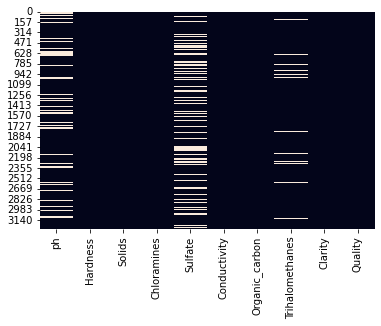

In [314]:
#From this we can see that the 3 columns with alot of missing data are sulfate, ph and trihalomethanes
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

#from this we can see the total number of missing data
pd.isnull(df).sum()

<h5>Bivariate Analysis</h5>

We will now analyse the relationships between the different variables. (rephrase)

<hr></hr>
 
<h5>Pearson's r Correlations</h5>

To check for correlation between the features and target, we will make use Pearson's r correlation coefficient. We will plot a heatmap to visualise the correlation between the different variables. (rephrase)

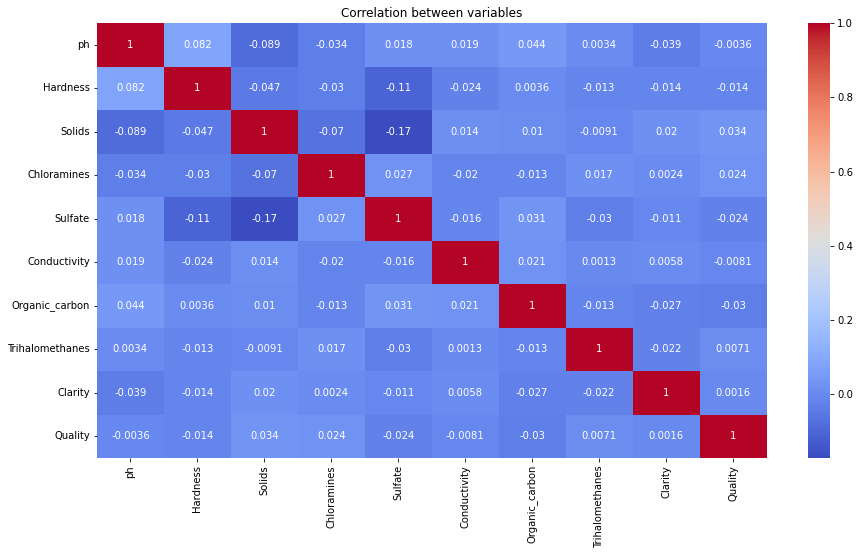

In [315]:
# Figure size
plt.figure(figsize=(15, 8))

# Plot
sns.heatmap(df.corr(), annot=True, cmap='coolwarm').set(title="Correlation between variables")

# Show Plot
plt.show()


<h5>Pairplot</h5>

Since our feature space is not extremely large, we can afford to plot out a Pairplot to visualise the distribution of data points with relation to our target variable.
<hr></hr>

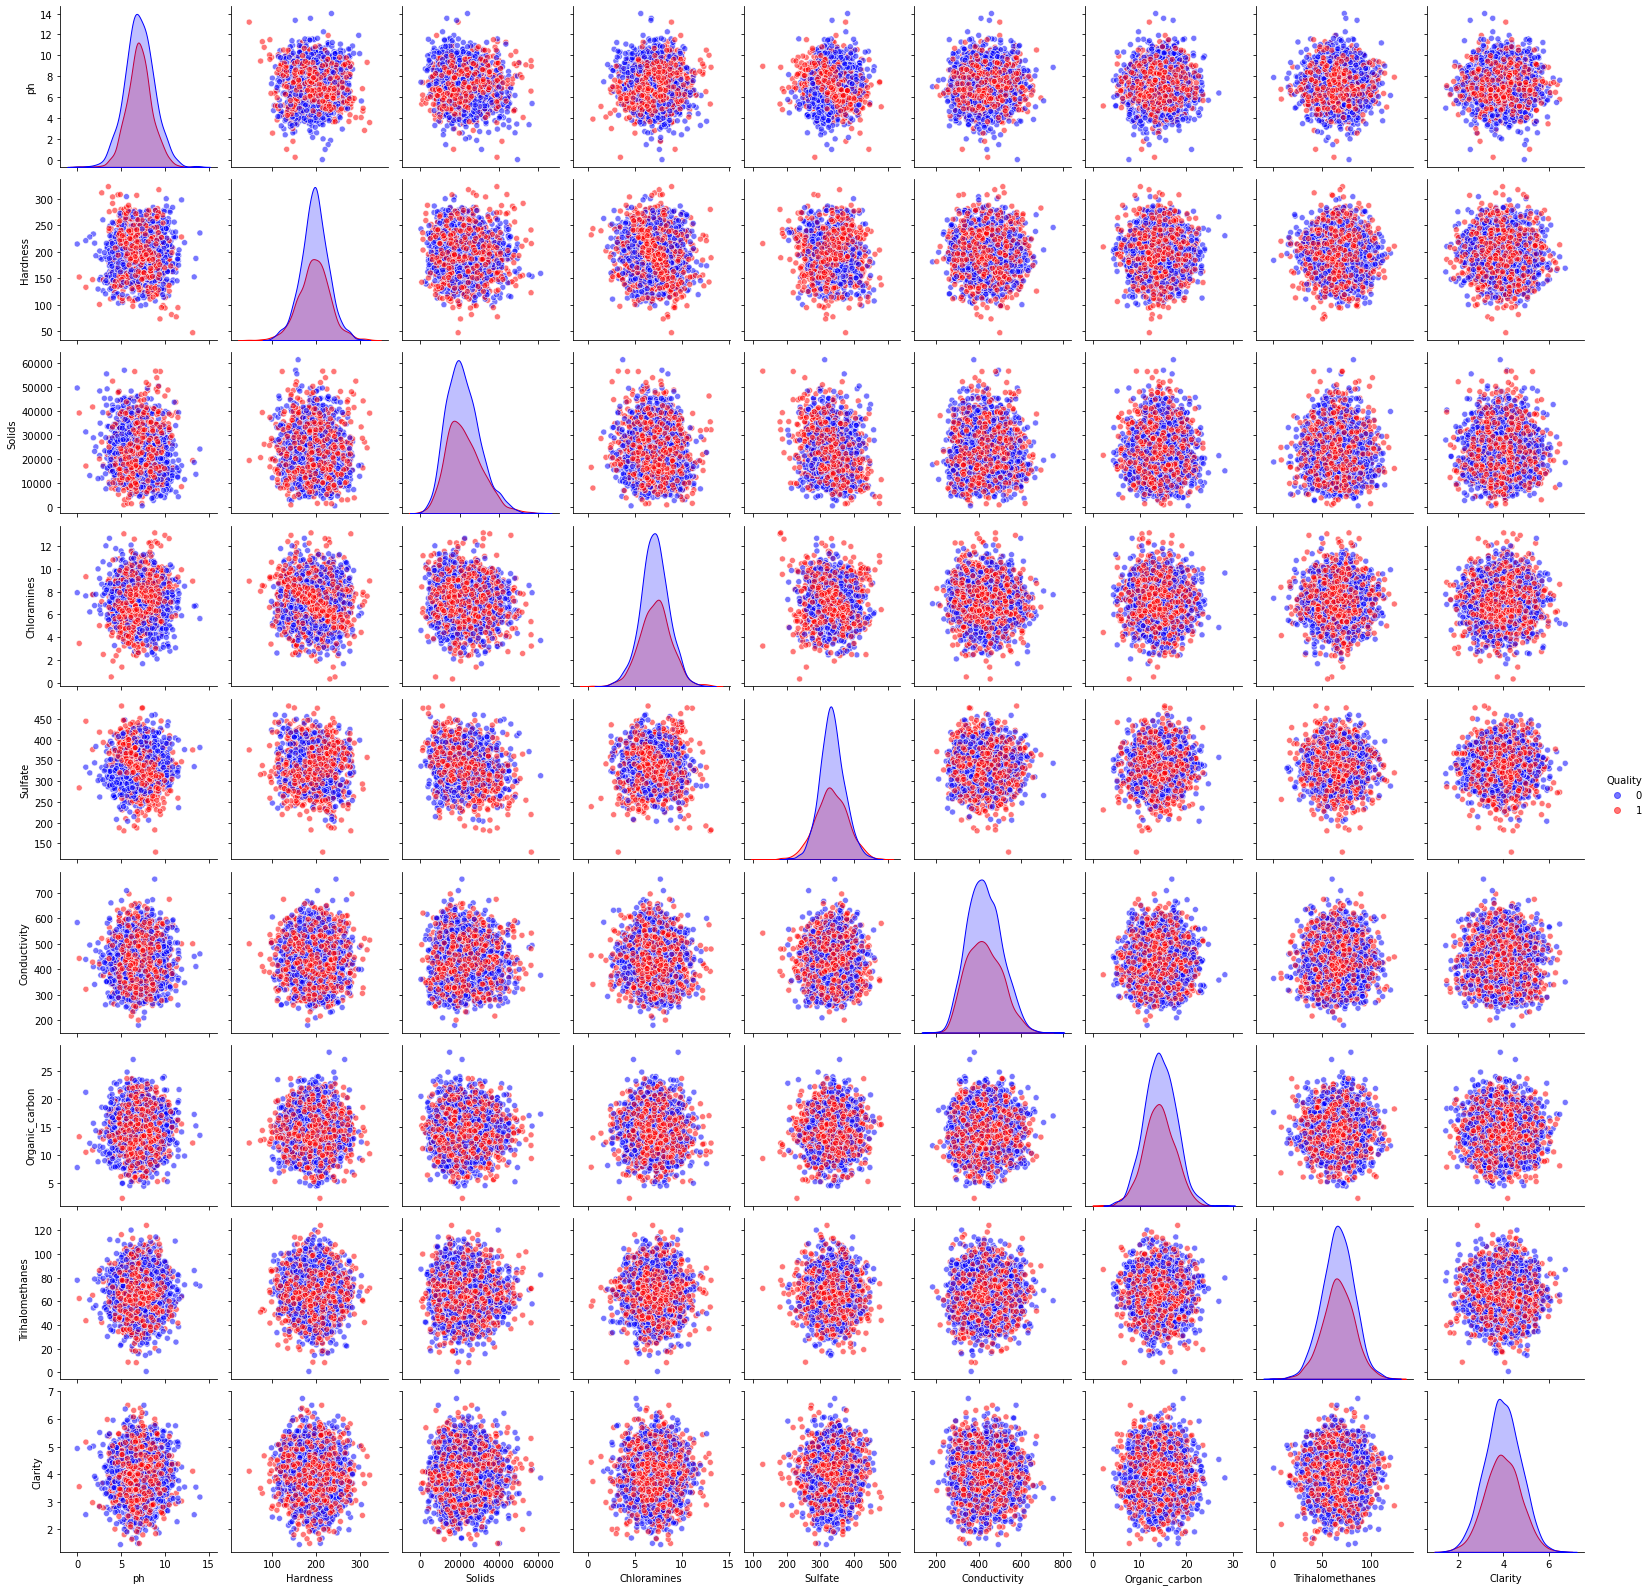

In [316]:
sns.pairplot(df, hue="Quality", palette=["#0000ff88", "#ff000088" ])
plt.show()

In [317]:
df.corr().abs()['Quality'].sort_values(ascending = False)

Quality            1.000000
Solids             0.033743
Organic_carbon     0.030001
Chloramines        0.023779
Sulfate            0.023577
Hardness           0.013837
Conductivity       0.008128
Trihalomethanes    0.007130
ph                 0.003556
Clarity            0.001581
Name: Quality, dtype: float64

Highest Correleation with Quality is Solids

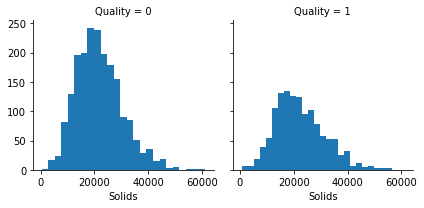

In [318]:
g = sns.FacetGrid(df, col='Quality')
g.map(plt.hist, 'Solids', bins=25)

<AxesSubplot:>

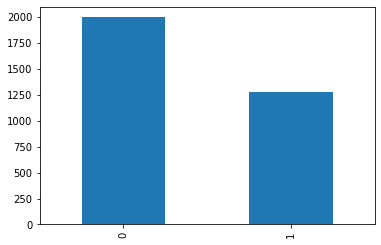

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

df.Quality.value_counts().plot(kind ='bar')

<hr></hr>
<h3>Data Preprocessing</h3>
<hr></hr>

In [320]:
df=df.dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0



<h5>Removing Outliers</h5>

Since our dataset has many outliers which is not essential to the data we can remove it.
<hr></hr>

In [321]:
def Outliers(column):
    q1=column.quantile(0.25)
    q3=column.quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*(IQR)
    upper=q3+1.5*(IQR)
    return column[(column<lower) | (column>upper)]

In [322]:
outliers_dict = {}
for column in df.select_dtypes(include=['number']):
    outliers = Outliers(df[column])
    if not outliers.empty:
        outliers_dict[column] = outliers

# Print potential outliers for each column
for column, outliers in outliers_dict.items():
    print(f"Potential outliers in column '{column}':")
    print(outliers)

Potential outliers in column 'ph':
9       11.180284
317     11.301794
692      1.757037
726      0.227499
783     11.898078
810      0.989912
1023    11.027880
1162    11.244507
1231     2.690831
1303    12.246928
1343     2.569244
1353    11.534880
2075    14.000000
2096    11.568768
2165     2.803563
2189     2.558103
2263    11.235426
2300     2.974429
2343     2.538116
2681     2.376768
2895    13.349889
2899     1.431782
2925    11.563169
2932     2.925174
2945    11.496702
2993     3.102076
3017    11.496859
3088     2.128531
3094     1.985383
3108    11.449739
3269    11.491011
Name: ph, dtype: float64
Potential outliers in column 'Hardness':
51      100.457615
71      116.299330
88      300.292476
180     278.056321
189     112.299486
218     276.733569
227     112.820254
258      98.771644
260     280.082411
262     278.585105
275     280.089655
278      81.710895
309     113.831112
317      77.459586
335      94.091307
342     282.739017
346     278.147524
379      73.492234

In [323]:
def replaceOut(column):
    q1=column.quantile(0.25)
    q3=column.quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*(IQR)
    upper=q3+1.5*(IQR)
    outliers=column[(column<=lower) | (column>=upper)]
    if not outliers.empty:
        column[outliers.index] = column.mean()
    return column

In [324]:
cor=df.corr()
df.corr().abs()['Quality'].sort_values(ascending = False)

Quality            1.000000
Solids             0.040674
Clarity            0.022682
Chloramines        0.020784
Organic_carbon     0.015567
Conductivity       0.015496
Sulfate            0.015303
ph                 0.014530
Trihalomethanes    0.009244
Hardness           0.001505
Name: Quality, dtype: float64

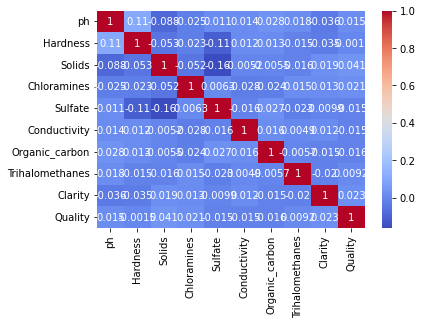

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

<h5>Normalizing and Standardizing of Dataset</h5>

<hr></hr>

In [326]:
X = df.drop(['Quality'], axis = 1)
Y = df['Quality']

In [327]:
from sklearn.preprocessing import StandardScaler

X= StandardScaler().fit_transform(X)

In [328]:
from sklearn.model_selection import train_test_split
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


<h5>Splitting Dataset into Test and Train</h5>

In [329]:
X_train, X_test, y_train, y_test = train_test_split(df[['ph','Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity']], df['Quality'], test_size=0.2, random_state=42)

In [330]:
# Verify split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (1608, 9)
X_test shape: (403, 9)


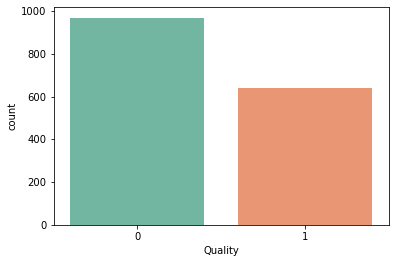

In [331]:
# Plot the distribution of the target label before resampling
sns.countplot(x=y_train, palette="Set2")
plt.show()

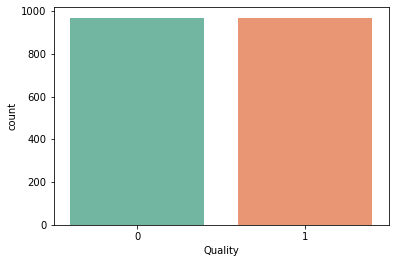

In [332]:
# SMOTE Oversampling
smote = SMOTE(random_state=42)

# Fit SMOTE to training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Plot the distribution of the target label after resampling
sns.countplot(x=y_resampled, palette="Set2")
plt.show()

In [333]:
# Support Vector Machine (Support Vector Classifier)
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# fit a SVC model to the data
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)
print(model)

# make predictions
y_pred = model.predict(X_test)

# summarize the fit of the model
svc_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

SVC()
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       231
           1       0.00      0.00      0.00       172

    accuracy                           0.57       403
   macro avg       0.29      0.50      0.36       403
weighted avg       0.33      0.57      0.42       403



f:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [334]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# fit a Decision Tree model to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions
y_pred = model.predict(X_test)

# summarize the fit of the model
ct_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.65      0.72      0.69       231
           1       0.57      0.49      0.53       172

    accuracy                           0.62       403
   macro avg       0.61      0.61      0.61       403
weighted avg       0.62      0.62      0.62       403



In [335]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a Logistic Regression model to the data
model = LogisticRegression()
model.fit(X_train, y_train)
print(model)

# make predictions
y_pred = model.predict(X_test)

# summarize the fit of the model
lr_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

LogisticRegression()
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       231
           1       0.00      0.00      0.00       172

    accuracy                           0.57       403
   macro avg       0.29      0.50      0.36       403
weighted avg       0.33      0.57      0.42       403



f:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [336]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# fit a Naive Bayes model to the data
model = GaussianNB()
model.fit(X_train, y_train)
print(model)

# make predictions
y_pred = model.predict(X_test)

# summarize the fit of the model
nb_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

GaussianNB()
              precision    recall  f1-score   support

           0       0.62      0.90      0.73       231
           1       0.66      0.24      0.36       172

    accuracy                           0.62       403
   macro avg       0.64      0.57      0.54       403
weighted avg       0.63      0.62      0.57       403



In [337]:
# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions
y_pred = model.predict(X_test)

# summarize the fit of the model
knn_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.58      0.70      0.64       231
           1       0.45      0.33      0.38       172

    accuracy                           0.54       403
   macro avg       0.52      0.51      0.51       403
weighted avg       0.53      0.54      0.53       403



In [338]:
print(f'KNN Model accuracy: {round(knn_accuracy,2)}')
print(f'Naive Bayes Model accuracy: {round(nb_accuracy,2)}')
print(f'Logistic Regression Model accuracy: {round(lr_accuracy,2)}')
print(f'Classification Tree Model accuracy: {round(ct_accuracy,2)}')
print(f'Support Vector Classifier Model accuracy: {round(svc_accuracy,2)}')

KNN Model accuracy: 0.54
Naive Bayes Model accuracy: 0.62
Logistic Regression Model accuracy: 0.57
Classification Tree Model accuracy: 0.62
Support Vector Classifier Model accuracy: 0.57
